## Observations and Insights 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [119]:
# Checking the number of mice in the DataFrame.
number_o_mice = len(merged_mouse_data['Mouse ID'].unique())
number_o_mice


249

In [120]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merged_mouse_data[merged_mouse_data.duplicated(['Mouse ID','Timepoint'])]

dup_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [121]:
# Optional: Get all the data for the duplicate mouse ID. 


In [122]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_mice_clean= merged_mouse_data.drop_duplicates(['Mouse ID','Timepoint'])



In [123]:
# Checking the number of mice in the clean DataFrame.
dup_mice_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Drug_vs_volume = dup_mice_clean[['Drug Regimen','Tumor Volume (mm3)']]

#Drug_names = Drug_vs_volume['Drug Regimen'].unique()
Volume_mean = Drug_vs_volume.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Volume_median = Drug_vs_volume.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Volume_variance = Drug_vs_volume.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Volume_sd = Drug_vs_volume.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Volume_sem = Drug_vs_volume.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stat = pd.DataFrame({
    #"Drug Regimen" : [Drug_names],
    "Tumor Volume Mean": Volume_mean, 
    "Tumor Volume Median": Volume_median,
    "Tumor Volume Variance": Volume_variance,
    "Tumor Volume Standard Deviation": Volume_sd,
    "Tumor Volume SEM": Volume_sem
    
})

summary_stat


# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mice_data_stat = dup_mice_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ["mean","median","var","std","sem"]})

mice_data_stat


# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

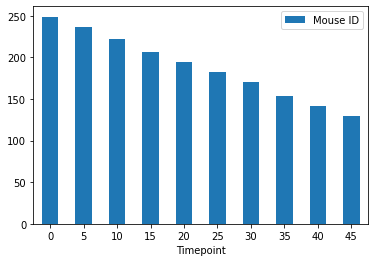

In [126]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#create DF
Mice_BP = pd.DataFrame(dup_mice_clean.groupby('Timepoint').agg({'Mouse ID':'nunique'}))

#Plot DF
BP_Mice_Treatment = Mice_BP.plot.bar(rot=0)





<BarContainer object of 10 artists>

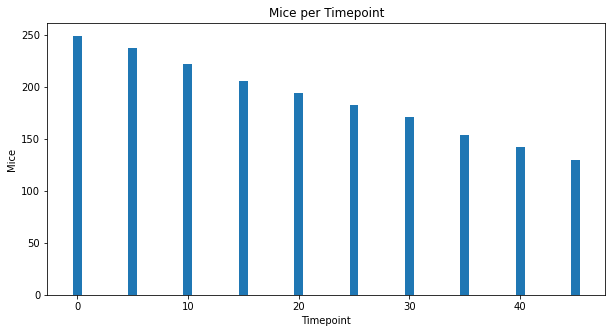

In [127]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = dup_mice_clean['Timepoint'].unique().tolist()


plt.figure(figsize=(10,5))
plt.title("Mice per Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Mice")
plt.bar(x_axis, Mice_BP['Mouse ID'], alpha=1)

## Pie Plots

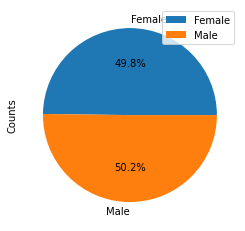

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = pd.DataFrame(dup_mice_clean.groupby('Sex').agg({'Mouse ID':'nunique'}))

mouse_sex.columns = ['Counts']

mouse_sex.plot.pie(y= 'Counts', autopct="%1.1f%%")


<ipython-input-129-ffe78debea0f>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(mouse_sex, labels=sex_labels, autopct="%1.1f%%", startangle=140)


([<matplotlib.patches.Wedge at 0x2332da843d0>,
 [Text(-0.7123680187966352, -0.8381717042442776, 'Male'),
  Text(0.7123680187966355, 0.8381717042442776, 'Females')],
 [Text(-0.3885643738890738, -0.4571845659514241, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

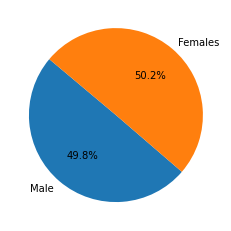

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_labels = ["Male", "Females"]

#we can use the same data from pie plots
plt.pie(mouse_sex, labels=sex_labels, autopct="%1.1f%%", startangle=140)


## Quartiles, Outliers and Boxplots

In [130]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


Promising_Treatments = pd.DataFrame(dup_mice_clean[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']])


Most_Promising = Promising_Treatments[(Promising_Treatments['Timepoint']>=45) & (Promising_Treatments['Tumor Volume (mm3)']<30)]


Most_Promising.head(4)


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964


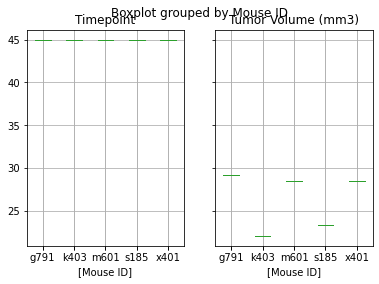

In [131]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Tumor_Vol = Most_Promising['Tumor Volume (mm3)']

Drug_boxplot = Most_Promising.boxplot(by=['Mouse ID'])

## Line and Scatter Plots

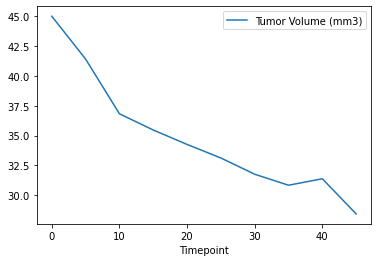

In [132]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Mouse_Ln_Plt_DF = dup_mice_clean[['Mouse ID','Drug Regimen','Timepoint','Weight (g)','Tumor Volume (mm3)']]

Mouse_Ln_Plt = Mouse_Ln_Plt_DF[(Mouse_Ln_Plt_DF['Drug Regimen'] == "Capomulin") & (Mouse_Ln_Plt_DF['Mouse ID'] == "m601")]

Mouse_Ln_Plts = Mouse_Ln_Plt[['Timepoint','Tumor Volume (mm3)']]


line_plot = Mouse_Ln_Plts.set_index('Timepoint').plot()





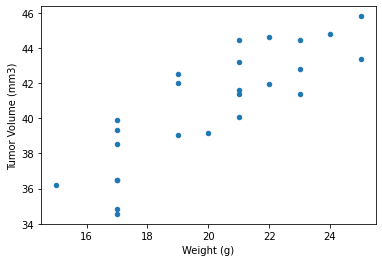

In [133]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#use same mouse table as previous

Mouse_Ln_Plt_Wgt = Mouse_Ln_Plt_DF[(Mouse_Ln_Plt_DF['Drug Regimen'] == "Capomulin")]

Mouse_Ln_Plt_Wgts = pd.DataFrame(Mouse_Ln_Plt_Wgt.groupby(["Mouse ID","Weight (g)"]).agg({"Tumor Volume (mm3)": "mean"}).reset_index())

Mouse_Ln_Plt_Wgts.plot(kind="scatter", x='Weight (g)', y='Tumor Volume (mm3)')
                                
#plt.show()

## Correlation and Regression

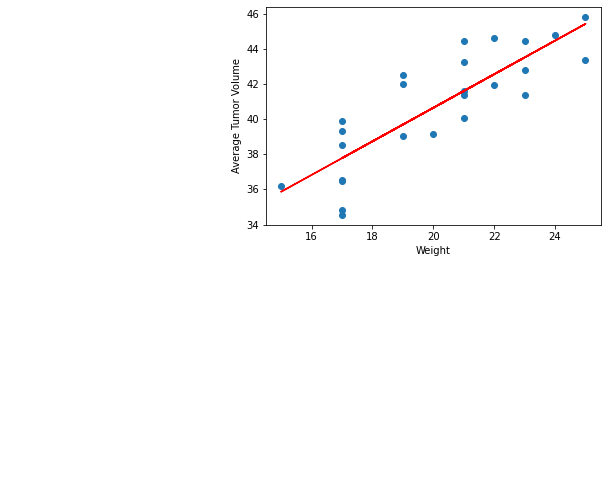

In [138]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#use same table from previous line plot. note to self - look at regression example from class
x_values = Mouse_Ln_Plt_Wgts['Weight (g)']
y_values = Mouse_Ln_Plt_Wgts['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,20),fontsize=20,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()


In [ ]:
Observations - 

1) Remicane seems to have produced the best results
2) More males were tested than females
3) There is a positive correlation of weight vs tumor volume